In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

# Setting up Data
dataSet1 = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])

dataSet2 = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

dataSet2 = dataSet2.filter(items=['sbp','tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd'])
sbp = dataSet2['sbp']
tobacco = dataSet2['tobacco']
ldl = dataSet2['ldl']
adiposity = dataSet2['adiposity']
typea = dataSet2['typea']
obesity = dataSet2['obesity']
alcohol = dataSet2['alcohol']
age = dataSet2['age']
chd = dataSet2['chd']


# Part A

Use Dataset 1 to answer Q1 to Q5. Suppose that each cluster’s initial seeds (centers) are A2, A3 and A8. Run the k-means algorithm for one epoch only. At the end of this epoch, show:

– Q1. The new clusters (i.e. the examples belonging to each cluster)

– Q2. The centers of the new clusters

– Q3. Plot a 10 by 10 space with all the 8 points and show the clusters after the first epoch and the new

– Q4. How many are more iterations needed to converge? Draw the result for each epoch.

– Q5. Based on the answer for Q4, run that many epochs for convergence and present a final cluster plot.

Q1:
Cluster #1 [array([2, 5]), array([1, 2])]
Cluster #2 [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster #3 [array([ 2, 10]), array([5, 8]), array([4, 9])]


Q2:
New Cluster #1 Center:  (1.5, 3.5)
New Cluster #2 Center:  (7.0, 4.333333333333333)
New Cluster #3 Center:  (3.6666666666666665, 9.0)


Q3:


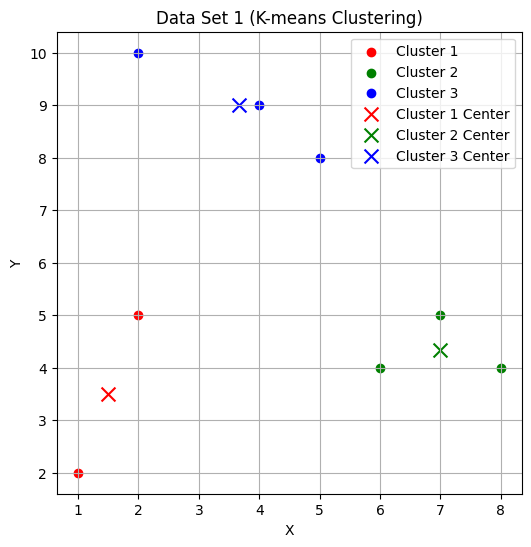



Q4 and Q5


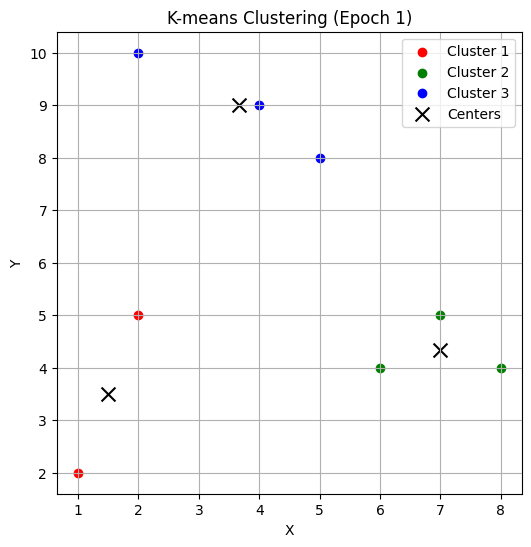

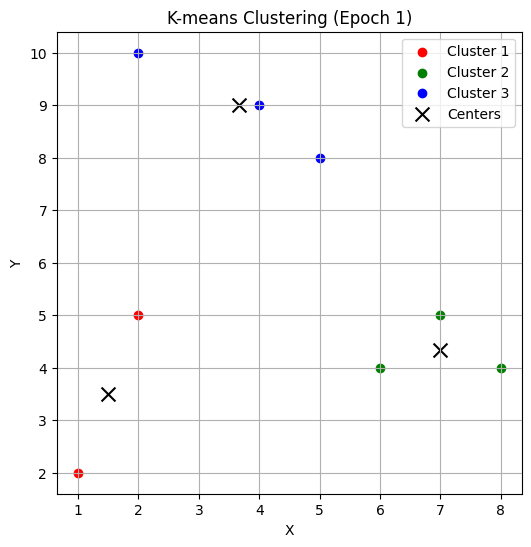

Iterations to convergence: 1




In [ ]:
cluster1 = [] # A2
cluster2 = [] # A3
cluster3 = [] # A8

for x in dataSet1: # For every point in data set 1
  distanceA2 = math.dist(x,dataSet1[1]) # calculate the distance between the point and intial seeds
  distanceA3 = math.dist(x,dataSet1[2])
  distanceA8 = math.dist(x,dataSet1[-1])

  if((distanceA2 < distanceA3) and (distanceA2 < distanceA8)): # Find the closest cluster of each point
    cluster1.append(x)                                         # and append to the respective cluster list

  if((distanceA3 < distanceA2) and (distanceA3 < distanceA8)):
    cluster2.append(x)

  if((distanceA8 < distanceA2) and (distanceA8 < distanceA3)):
    cluster3.append(x)

# Q1
print("Q1:")
print("Cluster #1", cluster1) # Print the array of clusters
print("Cluster #2", cluster2)
print("Cluster #3", cluster3)
print("\n")

def newCenter(cluster): # Method for finding the new cluster center points
  if len(cluster) == 0: # Edge case
    return 0, 0
  x = 0
  y = 0
  for i in range(len(cluster)):
    x += cluster[i][0]
    y += cluster[i][1]

  return x / len(cluster), y / len(cluster) # Return the average X and Y points of all points in a cluster

newCen1 = newCenter(cluster1) # call the function for each cluster
newCen2 = newCenter(cluster2)
newCen3 = newCenter(cluster3)

#Q2
print("Q2:")
print("New Cluster #1 Center: ", newCenter(cluster1)) # Print new point
print("New Cluster #2 Center: ", newCenter(cluster2))
print("New Cluster #3 Center: ", newCenter(cluster3))
print("\n")

#Q3
print("Q3:")
plt.figure(figsize=(6, 6))
plt.scatter(np.array(cluster1)[:,0], np.array(cluster1)[:,1], color='red', label='Cluster 1') # Plot X,Y Coordinate of each point in cluster and color it
plt.scatter(np.array(cluster2)[:,0], np.array(cluster2)[:,1], color='green', label='Cluster 2')
plt.scatter(np.array(cluster3)[:,0], np.array(cluster3)[:,1], color='blue', label='Cluster 3')
plt.scatter(*newCenter(cluster1), color='red', marker='x', s=100, label='Cluster 1 Center') # call the newCenter function for each cluster and mark it on the plot
plt.scatter(*newCenter(cluster2), color='green', marker='x', s=100, label='Cluster 2 Center')
plt.scatter(*newCenter(cluster3), color='blue', marker='x', s=100, label='Cluster 3 Center')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Set 1 (K-means Clustering)')
plt.legend()
plt.grid(True)
plt.show()
print("\n")

#Q4 and Q5
convergence = 0
epochNum = 0

centers = np.array([dataSet1[1], dataSet1[2], dataSet1[-1]]) # Reset Centers to initial seeds

print("Q4 and Q5")

while not convergence: # While not reaching convergence
  cluster1 = [] # Reset cluster arrays
  cluster2 = []
  cluster3 = []

  for x in dataSet1: # Similar process as Q1, find distance between each center and append to cluster array
    distanceA2 = math.dist(x, centers[0])
    distanceA3 = math.dist(x, centers[1])
    distanceA8 = math.dist(x, centers[2])

    if((distanceA2 < distanceA3) and (distanceA2 < distanceA8)):
      cluster1.append(x)

    if((distanceA3 < distanceA2) and (distanceA3 < distanceA8)):
      cluster2.append(x)

    if((distanceA8 < distanceA2) and (distanceA8 < distanceA3)):
      cluster3.append(x)

  updatedCenter = np.array([newCenter(cluster) for cluster in [cluster1, cluster2, cluster3]]) # Update centers for each cluster

  if np.allclose(centers, updatedCenter): # Compare current centers to previous center. If true then we reached convergence
    convergence = True
  else:
    centers = updatedCenter # Else set the previous centers to the new one
    epochNum += 1 # Increase the number of epochs

  plt.figure(figsize=(6, 6))
  plt.scatter(np.array(cluster1)[:,0], np.array(cluster1)[:,1], color='red', label='Cluster 1')
  plt.scatter(np.array(cluster2)[:,0], np.array(cluster2)[:,1], color='green', label='Cluster 2')
  plt.scatter(np.array(cluster3)[:,0], np.array(cluster3)[:,1], color='blue', label='Cluster 3')
  plt.scatter(centers[:,0], centers[:,1], color='black', marker='x', s=100, label='Centers')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f'K-means Clustering (Epoch {epochNum})')
  plt.legend()
  plt.grid(True)
  plt.show()

print("Iterations to convergence:", epochNum)
print("\n")


Use Dataset 2 to answer Q6 to Q8. Make all required assumptions and state your assumptions in detail and perform a K-Means clustering using sbp and tobacco features. Use the first 300 rows of data for training and the remaining data for testing.

– Q6. Provide accuracy.

– Q7. Plot ’sbp’ vs ’tobacco’ and represent the actual data points with different color to show the two classes. Hint: you may have to convert the labels from categorical to numeric values to plot.

– Q8. Plot ’sbp’ vs ’tobacco’ and represent the predicted data points with different color to show the two classes. Hint: you may have to convert the labels from categorical to numeric values to plot.

Q6
Accuracy:  0.6728395061728395

Q7


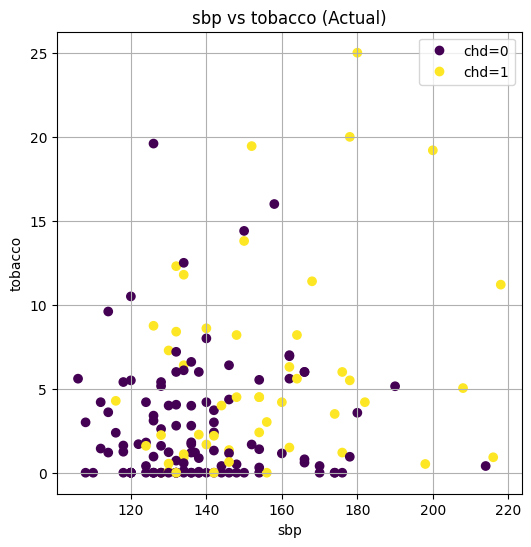


Q8


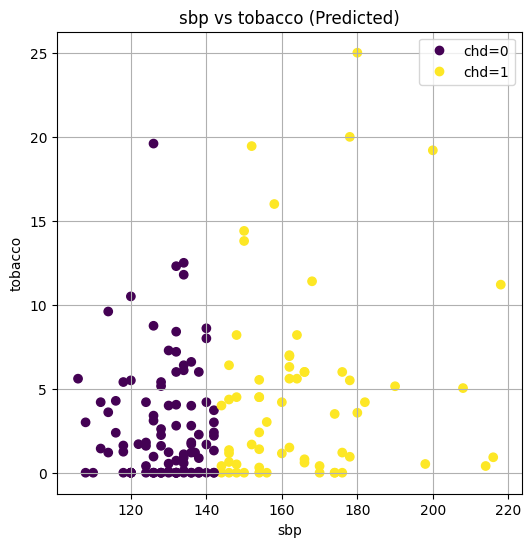

In [ ]:
# Q6

training = np.column_stack((sbp[:300], tobacco[:300])) # Create the training data

centers = np.array([[100, 3], [120, 5]]) # I assumed the intial cluster seeds will be these random points

print("Q6")

# Training the algorithm
convergence = False
while not convergence:
  cluster1 = [] # Reset cluster points
  cluster2 = []

  for x in training:
    distanceA2 = math.dist(x, centers[0]) # Compare points to cluster centers
    distanceA3 = math.dist(x, centers[1])

    if distanceA2 < distanceA3:
      cluster1.append(x)
    else:
      cluster2.append(x)

  updatedCenter = np.array([newCenter(cluster) for cluster in [cluster1, cluster2]]) # Update centers

  if np.allclose(centers, updatedCenter): # Check for convergence
    convergence = True

  else:
    centers = updatedCenter


# Testing the Algorithm
test1 = []
test2 = []
predicted = []

testing = np.column_stack((sbp[300:], tobacco[300:])) # Testing Data

for x in testing: # Compare each test point to the trained cluster seeds
  distanceA2 = math.dist(x, centers[0])
  distanceA3 = math.dist(x, centers[1])

  if distanceA2 < distanceA3: # If in cluster 1 then assume the chd value is 0
    test1.append(x)
    predicted.append(0)

  else:
    test2.append(x) # If in cluster 2 then assume the chd value is 1
    predicted.append(1)

chdTest = chd[300:] # True CHD Values

tn, fp, fn, tp = confusion_matrix(chdTest, predicted).ravel() # Confusion matrix to find accuracy
print("Accuracy: ", (tp + tn) / (tn + fp + fn + tp))

# Q7
print("\nQ7") # Plot Training Data and paint each class, chd = 0 or 1, with a different color
plt.figure(figsize=(6, 6))
scatter = plt.scatter(sbp[300:], tobacco[300:], c=chd[300:])
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('sbp vs tobacco (Actual)')
kmeanslabel = ['chd=0', 'chd=1']
plt.legend(scatter.legend_elements()[0], kmeanslabel)
plt.grid(True)
plt.show()

# Q8
print("\nQ8")
plt.figure(figsize=(6, 6))
scatter = plt.scatter(sbp[300:], tobacco[300:], c=predicted[:])
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('sbp vs tobacco (Predicted)')
plt.legend(scatter.legend_elements()[0], kmeanslabel)
plt.grid(True)
plt.show()



# Part B

Perform the Nearest Neighbor (NN) clustering algorithm for the Dataset 1 using Euclidean distance. Use the threshold value of 4.

– Q9. Have you got the same results as you got using K-Means?

– Q10. Give the final plot for NN clustering

– Q11. Compare the performance of K-means and nearest neighbour clustering algorithms. Provide disadvantages of the algorithms on bigger datasets.

Q9

Cluster 1: [array([ 2, 10]), array([5, 8]), array([4, 9])]
Cluster 2: [array([2, 5]), array([1, 2])]
Cluster 3: [array([8, 4]), array([7, 5]), array([6, 4])]

Yes, the results are the same as K-Means

Q10



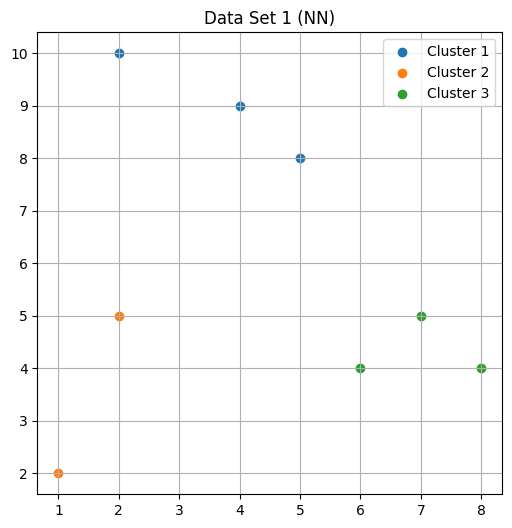


Q11

Both K-Means and K-NN performed the same when using Data Set 1 but, when the the data set got larger, like Data Set 2, 
then the K-Means algorithm outshines K-NN. This can be confirmed through their respective accuracy scores


In [ ]:
# Q9
def nearest(dataSet, threshold): # Function for Nearest Neighbour algorithm
  clusters = [0] * len(dataSet) # Assume that each data point doesn't belong to a cluster
  clusterNum = 1 # Track the cluster

  for i in range(len(dataSet)): # for the number of data points
    if clusters[i] == 0: # If the point i doesn't belong to a cluster than assign it one
      clusters[i] = clusterNum
      clusterNum += 1

    for j in range(len(dataSet)): # for each data point in the dataset
      if i != j and clusters[j] == 0: # If every other data point doesn't belong to a cluster
          if math.dist(dataSet[i],dataSet[j]) <= threshold: # If the distance between point i and j is less than the threshold
              clusters[j] = clusters[i] # Assign point j to i's cluster
  return clusters

def clusterOrg(clusters, dataSet):
  clustOrg = {} # Empty dictionary

  for i, clust in enumerate(clusters): # For each data point and it's respective cluster

    if clust not in clustOrg: # If the cluster doesn't exist in the dictionary
        clustOrg[clust] = []  # Create an empty list for that cluster

    clustOrg[clust].append(dataSet[i]) # Add the data point to that cluster
  return clustOrg

clusters = nearest(dataSet1, 4) # Call Nearest Neighbour Method

orgCluster = clusterOrg(clusters, dataSet1) # Organize the points into their clusters

print("Q9\n")
for clusNum, dataPoint in orgCluster.items(): # For each cluster and the data points associated with it
  print(f"Cluster {clusNum}:", dataPoint) # Print out the data points per cluster

print("\nYes, the results are the same as K-Means")

# Q10

print("\nQ10\n")
plt.figure(figsize=(6, 6))

for clusNum in np.unique(clusters): # For every unique cluster number
  dataPoint = dataSet1[clusters == clusNum] # Return the data points from dataSet1 that belong to that specific cluster number
  plt.scatter(dataPoint[:, 0], dataPoint[:, 1], label=f'Cluster {clusNum}') # Plot

plt.title('Data Set 1 (NN)')
plt.legend()
plt.grid()
plt.show()

# Q11
print("\nQ11\n")
print("Both K-Means and K-NN performed the same when using Data Set 1 but, when the the data set got larger, like Data Set 2, ")
print("then the K-Means algorithm outshines K-NN. This can be confirmed through their respective accuracy scores")

Use Dataset 2 to answer Q12. Make all required assumptions and state your assumptions in detail and perform NN clustering using sbp and tobacco features. Use the first 300 rows of
data for training and the remaining data for testing.

– Q12. Provide accuracy.

Q12



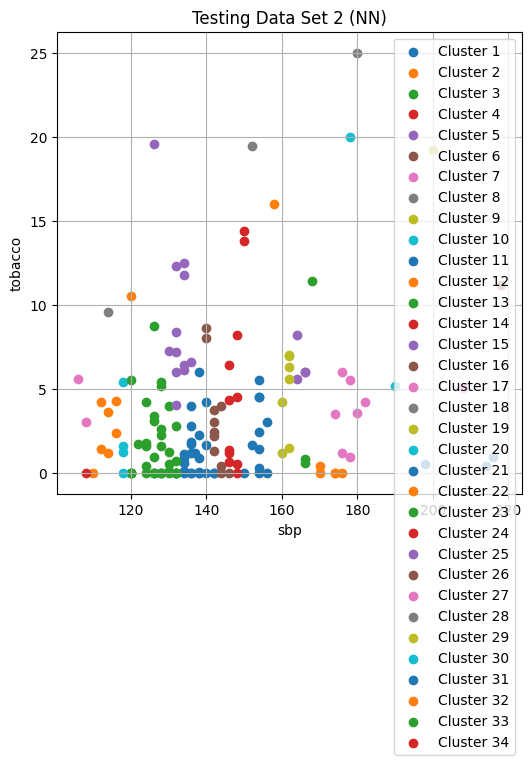


Accuracy: 0.6358024691358025


In [ ]:
# Q12

print("Q12\n")

# Assuming Threshold is 4

# Training Data
trainData = np.column_stack((sbp[0:300],tobacco[0:300]))
clusters = nearest(trainData, 4)
trainClusterDic = clusterOrg(clusters, trainData)

# Testing Data
testData = np.column_stack((sbp[300:], tobacco[300:]))
clustersTest = nearest(testData,4)
testClusterDic = clusterOrg(clustersTest, testData)

chdTest = [] # Predicted Values

for x in testData: # For each data point
  euc = np.linalg.norm(testData - x, axis=1) # Find distance between data point and rest
  nearPoint = np.argsort(euc)[:4] # Get the first four data points closest to the data point
  label = chd[nearPoint] # Grab those four CHD values
  ZeroOne, ind = np.unique(label, return_counts=True) # Count the 0s and 1s in each cluster
  newCHD = ZeroOne[np.argmax(ind)] # Find the most appearing number, either 0 or 1
  chdTest.append(newCHD) # Add that number to the predicted list

plt.figure(figsize=(6, 6))

for clusterNum, dataPoint in testClusterDic.items(): # For every cluster and their associated data points
  clusPoint = np.array(dataPoint) # Turn the data points of each cluster into an array
  plt.scatter(clusPoint[:, 0], clusPoint[:, 1], label=f'Cluster {clusterNum}') # Plot

plt.title('Testing Data Set 2 (NN)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.grid()
plt.show()

tn, fp, fn, tp = confusion_matrix(chd[300:], chdTest).ravel() # Use confusion matrix to get true/false positive and true/false negative values
print("\nAccuracy:", (tp + tn) / (tn + fp + fn + tp)) # Calculate accuracy

# Part C

• Perform the DBScan clustering algorithm for the Dataset 1 using Euclidean distance. Use
the epsilon = 2 and minpoint = 2.

- Q13. Provide the final cluster plot.

- Q14. Perform the DBScan for epsilon = √10 and provide the cluster plot.

Q13


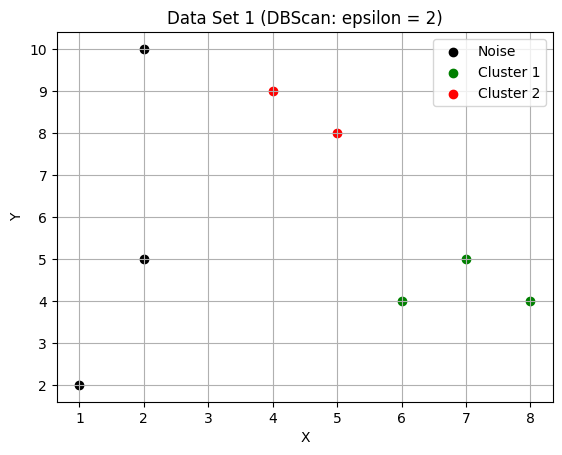


Q14



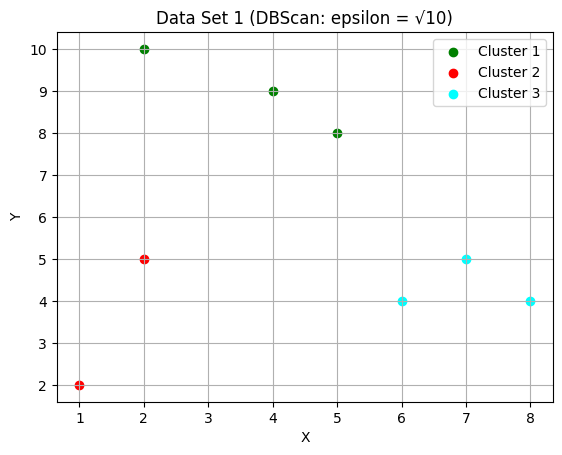

In [ ]:
# Q13

print("Q13")

epsilon = 2
minPoints = 2

def DBScan(dataSet, epsilon, minPoints):
  clusters = [0] * len(dataSet) # Set all associated clusters to 0 for each data point
  clusterNum = 0 # Number of clusters

  for i in range(len(dataSet)): # For each point

    if clusters[i] != 0: # If data point already has a cluster then go next point
        continue

    member = [] # List of members belonging to the cluster
    for j in range(len(dataSet)):
      if i != j and math.dist(dataSet[i], dataSet[j]) <= epsilon: # Find distance between current point and every other point
        member.append(j) # If less than epsilon value then append

    if len(member) < minPoints-1: # Check the minpoint condition, mark as noise if less
      clusters[i] = -1  # Mark as noise
    else:
      clusterNum += 1 # Else increase cluster counter and associate that data point to that cluster
      clusters[i] = clusterNum
      findOthers(dataSet, clusters, member, clusterNum, epsilon, minPoints) # Call function to find neighbours

  return clusters

def findOthers(dataSet, clusters, member, clusterNum, epsilon, minPoints):
  queue = member.copy() # Copy member list to not disturb original data

  while queue: # Constantly loop until empty list

    j = queue.pop(0) # Take latest point

    if clusters[j] == -1: # Check if noise
      clusters[j] = clusterNum  # Change noise to border

    elif clusters[j] == 0: # Check if not assigned a cluster
      clusters[j] = clusterNum # Assign the cluster
      otherMems = [] # Check for potentially other members

      for k in range(len(dataSet)):
          if math.dist(dataSet[j],dataSet[k]) <= epsilon: # Check if distance between current and other points is less than epsilon
              otherMems.append(k) # If so then add to list

      if len(otherMems) >= minPoints: # If there more potential members than minPoint threshold then
          queue.extend(otherMems) # extend the queue

DBSTest1 = DBScan(dataSet1, epsilon, minPoints) # Call DBScan Method

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink'] # List of colors to use since many clusters can be found

for label in np.unique(DBSTest1):
  if label == -1: # If noise
    noise = DBSTest1 == label # Find all points that are considered noise, will be noted as True
    plt.scatter(dataSet1[noise][:, 0], dataSet1[noise][:, 1], color='black', label='Noise')

  else: # If a certain cluster number
    clust = DBSTest1 == label # Find all points that are associated with the cluster, will be noted as True
    plt.scatter(dataSet1[clust][:, 0], dataSet1[clust][:, 1], color=colors[label % len(colors)], label=f'Cluster {label}') # Plot

plt.title('Data Set 1 (DBScan: epsilon = 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

# Q14
print("\nQ14\n")

epsilon = math.sqrt(10)

DBSTest2 = DBScan(dataSet1, epsilon, minPoints)
for label in np.unique(DBSTest2):
  if label == -1: # If noise
    noise = DBSTest2 == label  # Find all points that are considered noise, will be noted as True
    plt.scatter(dataSet1[noise][:, 0], dataSet1[noise][:, 1], color='black', label='Noise')

  else: # If a certain cluster number
    clust = DBSTest2 == label # Find all points that are associated with the cluster, will be noted as True
    plt.scatter(dataSet1[clust][:, 0], dataSet1[clust][:, 1], color=colors[label % len(colors)], label=f'Cluster {label}')

plt.title('Data Set 1 (DBScan: epsilon = √10)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()



Use Dataset 2 to answer Q15. Make all required assumptions, state your assumptions in detail, and perform DBScan clustering using sbp and tobacco features. Use the first 300 rows of data for training and the remaining data for testing.
-  Q15. Provide accuracy and compare K-means, NN, and DBScan clustering performance for Dataset 1 and Dataset 2.

Q15


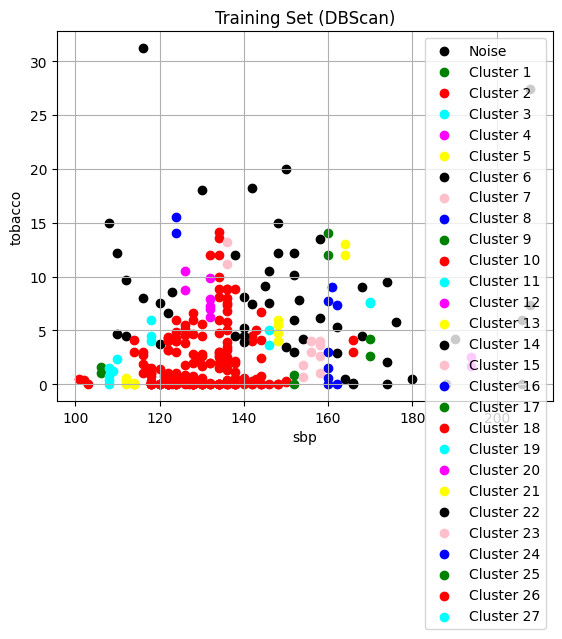

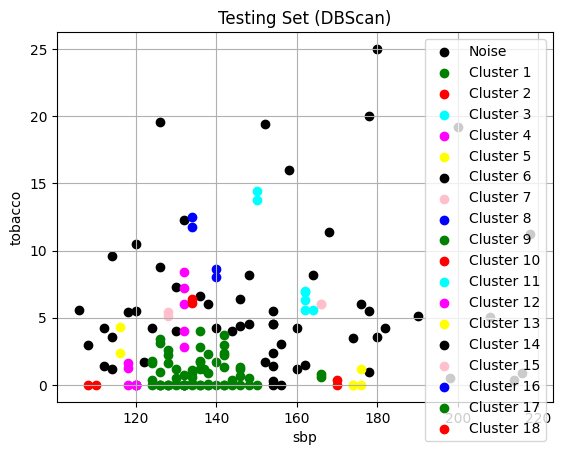


Accuracy: 0.691358024691358

For data set 1, all clustering algorithms can arrive to the same conclusion if the correct parameters are used.
DBScan requires to use an epsilon greater than 2 in order to remove any noise and classify each data point.

For data set 2, DBScan appears to have a slightly better accuracy when compared to KMeans and Nearest Neighbours.
In terms of performance, DBScan > KMeans > Nearest Neighbours


In [ ]:
# Q15
print("Q15")

# Training
epsilon = 2 #math.sqrt(10)

# Use same steps as shown when applying DBScan to Data Set 1
trainDBScan = DBScan(trainData, epsilon, minPoints)
for label in np.unique(trainDBScan):
  if label == -1:
    noise = trainDBScan == label
    plt.scatter(trainData[noise][:, 0], trainData[noise][:, 1], color='black', label='Noise')
  else:
    clus = trainDBScan == label
    plt.scatter(trainData[clus][:, 0], trainData[clus][:, 1], color=colors[label % len(colors)], label=f'Cluster {label}')

plt.title('Training Set (DBScan)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.grid()
plt.show()

# Testing

testDBScan = DBScan(testData, epsilon, minPoints)
for label in np.unique(testDBScan):
  if label == -1:
    noise = testDBScan == label
    plt.scatter(testData[noise][:, 0], testData[noise][:, 1], color='black', label='Noise')
  else:
    clus = testDBScan == label
    plt.scatter(testData[clus][:, 0], testData[clus][:, 1], color=colors[label % len(colors)], label=f'Cluster {label}')

plt.title('Testing Set (DBScan)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.grid()
plt.show()

epsilon = math.sqrt(10)
DBSAcc = []
chdTest = []

for i in range(len(testData)): # For i in range length of the test data
  members = [] # Create an empty members list for close data points
  for j in range(len(testData)): # Another loops for comparison
    if i != j: # If not the same point
      if math.dist(testData[i], testData[j]) <= epsilon: # Check if distance between points is less than epslion
        members.append(j + 300)  # Need index of position in original data
  DBSAcc.append(members)

clusters = {} # Empty dictionary

for index, members in enumerate(DBSAcc): # For each cluster and it's associated data points
  classify = []  # Empty List for CHD values

  for x in members:  # Iterate over each index in the neighbors list
    if x < len(chd):  # Remove out of bounds issues I was experiencing
        classify.append(chd[x])  # Grab associated chd values

  if classify: # Checks if classified list is empty, true if not
    chdValue, counts = np.unique(classify, return_counts=True) # Counts 0 or 1s from group of data points
    newClassify = chdValue[np.argmax(counts)] # Finds most occuring value
    clusters[index] = newClassify # Store new chd value

for members in DBSAcc:
  if members: # If not empty
    newClassify = clusters.get(members[0], 0) # Grab chd value, default to 0
    chdTest.append(newClassify) # Add to predicted list
  else:
    chdTest.append(0)  # Default case

# Calculate accuracy
tn, fp, fn, tp = confusion_matrix(chd[300:], chdTest).ravel()
print("\nAccuracy:", (tp + tn) / (tn + fp + fn + tp))

print("\nFor data set 1, all clustering algorithms can arrive to the same conclusion if the correct parameters are used.")
print("DBScan requires to use an epsilon greater than 2 in order to remove any noise and classify each data point.\n")

print("For data set 2, DBScan appears to have a slightly better accuracy when compared to KMeans and Nearest Neighbours.")
print("In terms of performance, DBScan > KMeans > Nearest Neighbours")

# Part D

##Use sklearn to verify your results for k-means, Nearest Neighbor clustering and DBScan clustering.
##- Q16. Provide your observations with comparisions.

###K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


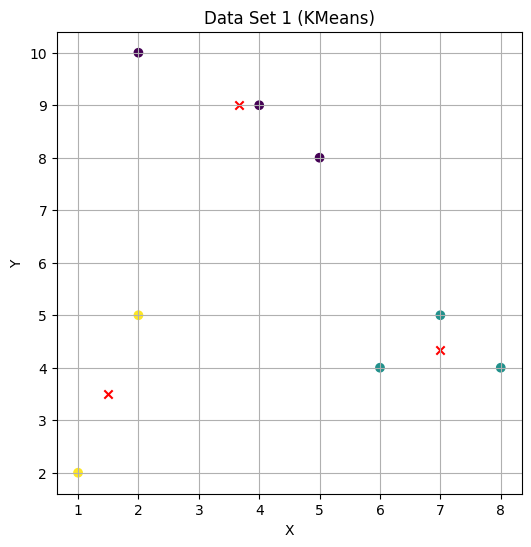


Accuracy: 0.6790123456790124

SKLearn KMeans provides the same results as my algorithm for both Data Set 1 and 2.
Data Set 1: Same cluster centers and clusters as my own algorithm.
Data Set 2: Similar performance in terms of accuracy.


In [ ]:
# K-Means

kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(dataSet1)
labels1 = kmeans1.labels_

kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(training)
labels2 = kmeans2.labels_

print("Cluster Centers:\n", kmeans1.cluster_centers_)

plt.figure(figsize=(6, 6))
plt.scatter(dataSet1[:, 0], dataSet1[:, 1], c=labels1)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data Set 1 (KMeans)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

predicted = kmeans2.predict(testing)
accuracy = accuracy_score(chd[300:], predicted)
print("\nAccuracy:", accuracy)


print("\nSKLearn KMeans provides the same results as my algorithm for both Data Set 1 and 2.")
print("Data Set 1: Same cluster centers and clusters as my own algorithm.")
print("Data Set 2: Similar performance in terms of accuracy.")

### K-NN

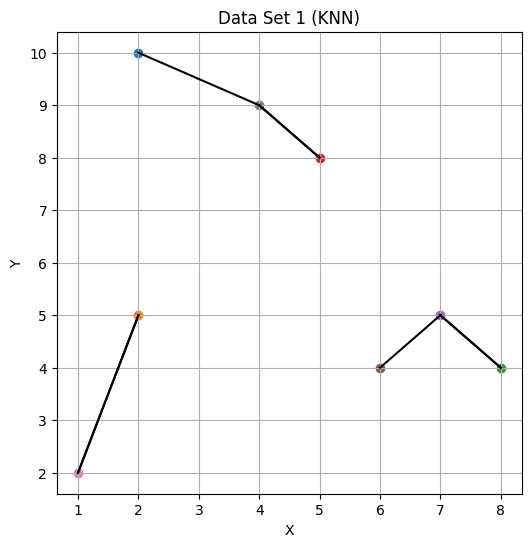

Accuracy: 0.654320987654321

SKLearn NN provides the same results as my algorithm for both Data Set 1 and 2.
Data Set 1: Same clusters as my own algorithm.
Data Set 2: Similar performance in terms of accuracy.


In [ ]:
# KNN

# Data Set 1
nn = NearestNeighbors(n_neighbors=2).fit(dataSet1)
distances, index = nn.kneighbors(dataSet1)

plt.figure(figsize=(6, 6))
for i in range(len(dataSet1)):
  plt.scatter(dataSet1[i, 0], dataSet1[i, 1])

for i in range(len(dataSet1)):
  for neighbour in index[i]:
    plt.plot([dataSet1[i, 0], dataSet1[neighbour, 0]], [dataSet1[i, 1], dataSet1[neighbour, 1]], c='black')

plt.title('Data Set 1 (KNN)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

# Data Set 2
testing = np.column_stack((sbp[300:], tobacco[300:]))
training = np.column_stack((sbp[:300], tobacco[:300]))

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(training, chd[:300])

predicted = knn.predict(testing)

# Calculate accuracy
accuracy = accuracy_score(chd[300:], predicted)
print("Accuracy:", accuracy)

print("\nSKLearn NN provides the same results as my algorithm for both Data Set 1 and 2.")
print("Data Set 1: Same clusters as my own algorithm.")
print("Data Set 2: Similar performance in terms of accuracy.")

### DBScan

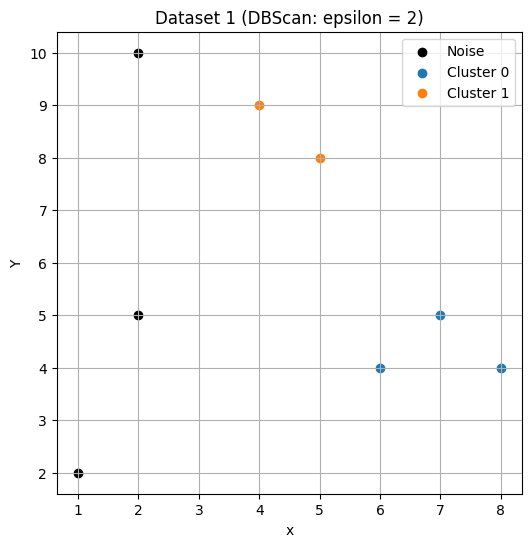

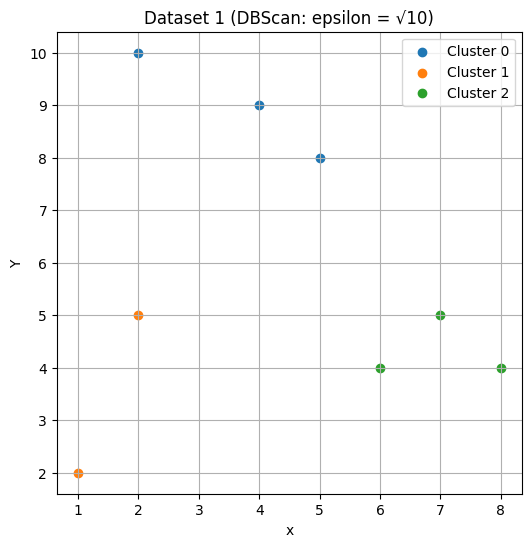


Accuracy: 0.5432098765432098

SKLearn DBScan provides the somewhat similar results as my algorithm for both Data Set 1 and 2.
Data Set 1: Same clusters and noise as my own algorithm.
Data Set 2: Slightly lower performance in terms of accuracy when compared to my own algorithm. Most likely error in coding the SKLearn.


In [ ]:
# DBScan

# Data Set 1
dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(dataSet1)
labels = dbscan.labels_

plt.figure(figsize=(6, 6))
unique_labels = np.unique(labels)
for label in unique_labels:
  if label == -1:
    plt.scatter(dataSet1[labels == label][:, 0], dataSet1[labels == label][:, 1], c='black', label='Noise')
  else:
    plt.scatter(dataSet1[labels == label][:, 0], dataSet1[labels == label][:, 1], label=f'Cluster {label}')

plt.title('Dataset 1 (DBScan: epsilon = 2)')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()


dbscan = DBSCAN(eps=math.sqrt(10), min_samples=2)
dbscan.fit(dataSet1)
labels = dbscan.labels_

plt.figure(figsize=(6, 6))
unique_labels = np.unique(labels)
for label in unique_labels:
  if label == -1:
    plt.scatter(dataSet1[labels == label][:, 0], dataSet1[labels == label][:, 1], c='black', label='Noise')
  else:
    plt.scatter(dataSet1[labels == label][:, 0], dataSet1[labels == label][:, 1], label=f'Cluster {label}')

plt.title('Dataset 1 (DBScan: epsilon = √10)')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()


dbscan = DBSCAN(eps=math.sqrt(10), min_samples=2)
dbscan.fit(training)
labels = dbscan.labels_

predicted = dbscan.fit_predict(testing)

# Calculate accuracy
accuracy = accuracy_score(chd[300:], predicted)
print("\nAccuracy:", accuracy)

print("\nSKLearn DBScan provides the somewhat similar results as my algorithm for both Data Set 1 and 2.")
print("Data Set 1: Same clusters and noise as my own algorithm.")
print("Data Set 2: Slightly lower performance in terms of accuracy when compared to my own algorithm. Most likely error in coding the SKLearn.")

# 1) What are the different metrics used to evaluate the performance of different clustering algorithms?
- Silhouette Score, Davis-Bouldin Index (DBI), Adjusted Rand Index (ARI), Calinski-Harabasz Index, etc


# 2) Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

- We can use precision, recall, and F1-Score since we are doing binary classification and those metrics work well